In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def verspreiding(xstart, r, n, ruis = 0.1):
    x = xstart
    yield x
    for i in range(n):
        x *= r * (np.random.randn() * ruis + 1)
        yield x

print(list(verspreiding(100, 1.2, 10)))

[100, 136.62179014210108, 148.82900761126217, 164.82848677138577, 191.3160565455605, 251.34046283673052, 342.0926532706574, 421.5472162102366, 516.011683408188, 679.0213863776348, 822.4718445135653]


In [31]:
start = 100
r = 1.2
n = 10
y = np.array(list(verspreiding(start, r, n)))
y

array([100.        , 119.41340738, 157.90270414, 186.55244787,
       245.88515433, 321.05106672, 395.1950471 , 415.00494723,
       561.85723632, 706.07180251, 796.12708885])

In [32]:
x = np.arange(n + 1)

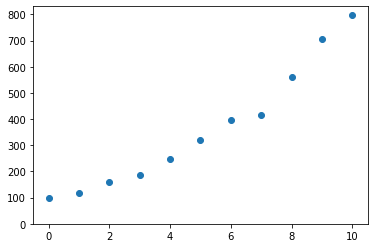

In [33]:
plt.scatter(x, y)
plt.ylim(bottom=0)
plt.show()

In [34]:
def model(x, r, x0):
    return x0 * r ** x

In [35]:
y_model = model(x, r, start)

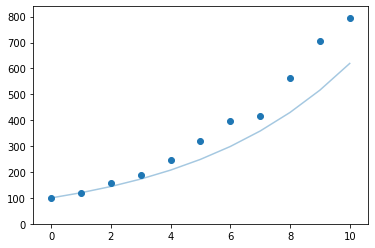

In [36]:
plt.plot(x, model(x, r, start), alpha=0.4)
plt.scatter(x, y)
plt.ylim(bottom=0)
plt.show()

In [37]:
from scipy import optimize
resultaat = optimize.curve_fit(model, 
                               x, y, 
                               p0=(1, start), 
                               bounds=((0, 3), (start, start)))
coefs, *_ = resultaat
r_best_fit = coefs[0]
coefs

array([  1.23631229, 100.        ])

In [38]:
from functools import partial
fit = partial(model, r=coefs[0], x0=coefs[1])

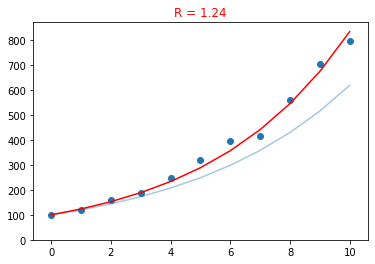

In [39]:
plt.plot(x, model(x, r, start), alpha=0.4)
plt.scatter(x, y)
plt.plot(x, fit(x), color='red')
plt.ylim(bottom=0)
plt.title('R = %.2f' % r_best_fit, color='red')
plt.show()

In [40]:
y_log = np.log(y)

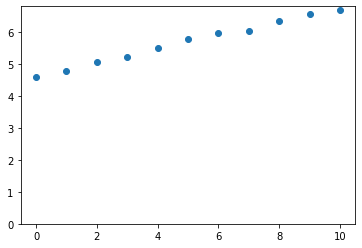

In [41]:
plt.scatter(x, y_log)
plt.ylim(bottom=0)
plt.show()

In [42]:
coefs_log = np.polyfit(x, y_log, 1)
fit_log = np.poly1d(coefs_log)

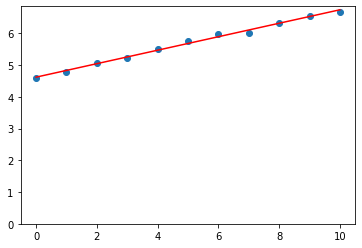

In [43]:
plt.scatter(x, y_log)
plt.plot(x, fit_log(x), color='red')
plt.ylim(bottom=0)
plt.show()

In [45]:
coefs_log_fit = np.exp(coefs_log)
r_log_fit = coefs_log_fit[0]
print('R = %.2f' % r_log_fit)
coefs_log_fit

R = 1.24


array([  1.23663033, 101.78833175])

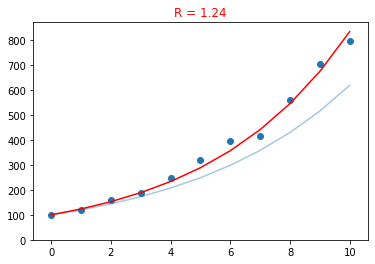

In [46]:
plt.plot(x, model(x, r, start), alpha=0.4)
plt.scatter(x, y)
plt.plot(x, fit(x), color='red')
plt.ylim(bottom=0)
plt.title('R = %.2f' % r_log_fit, color='red')
plt.show()